HackerRank SQL Queries

Query 1: 
SELECT * FROM city
WHERE population > 100000 AND countrycode = 'USA';

Query 2:
SELECT name FROM city
WHERE population > 120000 AND countrycode = 'USA';

Query 3:
SELECT * FROM city;

Query 4:
SELECT * FROM city
WHERE id = 1661;

Query 5:
SELECT * FROM city
WHERE countrycode = 'JPN';

Query 6:
SELECT name FROM city
WHERE countrycode = 'JPN';

Query 7:
SELECT city, state FROM station

Query 8:
SELECT DISTINCT city FROM station
WHERE (id % 2) = 0;

Query 9:
SELECT (count(city) - count(DISTINCT city)) FROM station;

Query 10:
SELECT city, LENGTH(city) FROM station
ORDER BY LENGTH(city), city LIMIT 1;

SELECT city, LENGTH(city) FROM station
ORDER BY LENGTH(city) DESC, city LIMIT 1;

1. Get the player names, player hometowns, school names, player positions, and school conferences for all players with position ‘QB’ or ‘WR’

    SELECT player_name, hometown, full_school_name, position, teams.conference 
    FROM benn.college_football_players players
    JOIN benn.college_football_teams teams
    ON players.school_name = teams.school_name
    WHERE players.position = 'QB' OR players.position ='WR'
    
2. Create a table that displays the average height of players at each position.
    
    SELECT AVG(height), position FROM benn.college_football_players 
    WHERE height != 0 and position != '?'
    GROUP BY position
    ORDER BY avg DESC
    
3. Write a query that find the top 5 tallest players, as well as their position, height, school, and the conference they belong to.  

    SELECT player_name, position, height, full_school_name, teams.conference 
    FROM benn.college_football_players players
    JOIN benn.college_football_teams teams
    ON players.school_name = teams.school_name
    ORDER BY height DESC
    LIMIT 5
    
4. Write a query that gets the company name, founding date, acquirer name, and acquisition date from the crunchbase database.

    SELECT name, founded_at, acq.acquired_at, acq.acquirer_name
    FROM tutorial.crunchbase_companies comp
    JOIN tutorial.crunchbase_acquisitions acq
    ON comp.name = acq.company_name
    ORDER BY acquirer_name

5. Companies from which 10 cities have the highest average acquisition amount?

    SELECT region, AVG(funding_total_usd) AS avg_funding
    FROM tutorial.crunchbase_companies 
    WHERE region != 'unknown' AND funding_total_usd > 0
    GROUP BY region
    HAVING COUNT(region) >= 10
    ORDER BY avg_funding DESC

6. Write a query (or queries) that compares the average amount of investment raised by companies in SF per quarter to companies in NYC.  

7. What is the max/min/average amount of investment money raised by companies in SF that have been acquired at some point?

8. In SF, what pd_district am I most likely to have my car stolen, and on what day of the week is this most likely?

9. Which top 3 categories of crime are most likely to go unresolved in Mission District?


For companies in SF with names that start with the letter ‘a’, what percentage of companies raise a funding total between \$25 and \$30 million? Create a visualization that shows this on a graph of a normal distribution. 

    SELECT *
    FROM tutorial.crunchbase_companies 
    WHERE city = 'San Francisco' AND (name LIKE 'a%' OR name LIKE 'A%') AND funding_total_usd != 0

HackerRank SQL JOIN Queries

Query 1: 
SELECT SUM(city.Population)
FROM city
JOIN country
ON city.CountryCode = country.Code
WHERE Continent = 'Asia'

Query 2:
SELECT city.name
FROM city
JOIN country
ON city.CountryCode = country.Code
WHERE Continent = 'Africa'

Query 3:
SELECT country.Continent, FLOOR(AVG(city.population))
FROM city
JOIN country
ON city.CountryCode = country.Code
GROUP BY country.Continent

Query 4:

Query 5:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1547)

In [2]:
sf_df = pd.read_csv('datasets/sf_a_companies.csv')
sf_df.describe()

,funding_total_usd,funding_rounds,founded_year,id
count,8.100000e+01,81.000000,72.000000,81.000000
mean,1.538720e+07,2.098765,2008.569444,1359.185185
std,3.963926e+07,1.365695,3.695549,598.810615
min,5.000000e+03,1.000000,1995.000000,285.000000
25%,1.000000e+06,1.000000,2007.000000,769.000000
50%,3.000000e+06,2.000000,2010.000000,1498.000000
75%,1.600000e+07,3.000000,2011.000000,1892.000000
max,3.264410e+08,6.000000,2013.000000,2370.000000


In [3]:
# Removes two outliers
sf_no_outliers_df = sf_df[sf_df['funding_total_usd'] <= 80000000]
sf_no_outliers_df.describe()

,funding_total_usd,funding_rounds,founded_year,id
count,7.700000e+01,77.000000,68.000000,77.000000
mean,8.721070e+06,1.961039,2008.705882,1353.545455
std,1.249811e+07,1.240135,3.725903,608.931496
min,5.000000e+03,1.000000,1995.000000,285.000000
25%,1.000000e+06,1.000000,2007.000000,727.000000
50%,2.879987e+06,1.000000,2010.000000,1476.000000
75%,1.000000e+07,3.000000,2011.000000,1908.000000
max,5.000000e+07,6.000000,2013.000000,2370.000000


(array([ 48.,  10.,   2.,   4.,   4.,   1.,   3.,   2.,   1.,   2.]),
 array([  5.00000000e+03,   5.00450000e+06,   1.00040000e+07,
          1.50035000e+07,   2.00030000e+07,   2.50025000e+07,
          3.00020000e+07,   3.50015000e+07,   4.00010000e+07,
          4.50005000e+07,   5.00000000e+07]),
 <a list of 10 Patch objects>)

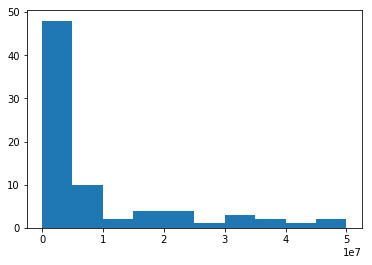

In [4]:
# With outlier
# funding_totals = sf_df['funding_total_usd'].apply(lambda x: '%.0f' % x).astype(np.int).values
# funding_totals
# plt.hist(x=funding_totals)
# Without outlier
funding_totals = sf_no_outliers_df['funding_total_usd'].values
plt.hist(x=funding_totals)

In [5]:
import random

def get_sample(dataset, n=30):
    """Grabs a random subsample of size 'n' from dataset.
    Outputs the mean of the subsample."""
    sampled_data = []
    
    for i in range(n):
        random_number = random.choice(dataset)
        sampled_data.append(random_number)

    mean = np.mean(sampled_data)
    return mean
    
def create_sample_distribution(dataset, size=100):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    sample_dist = []
    
    for i in range(size):
        sample_dist.append(get_sample(dataset))
    
    return sample_dist

(array([  17.,  115.,  188.,  271.,  211.,  140.,   44.,    9.,    3.,    2.]),
 array([  3165059.13333333,   4690692.82333333,   6216326.51333333,
          7741960.20333333,   9267593.89333333,  10793227.58333333,
         12318861.27333333,  13844494.96333333,  15370128.65333333,
         16895762.34333333,  18421396.03333334]),
 <a list of 10 Patch objects>)

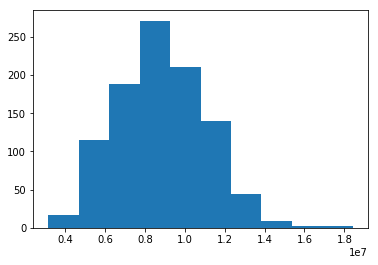

In [6]:
plt.hist(create_sample_distribution(funding_totals, 1000))